In [1]:
import sarracen as src
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

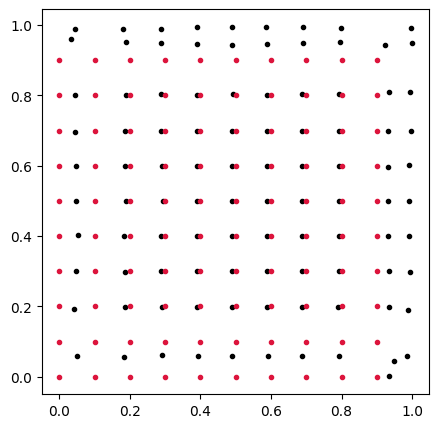

In [2]:
sdf_ini = pd.read_csv('../Data/initial_distribution/ideal_gas.csv')
sdf_n = pd.read_csv('../Data/results/ideal_gas.csv')

fig = plt.figure(figsize=(5,5))
plt.plot(sdf_n['x'], sdf_n['y'], '.', color='k')
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

In [3]:
sdf = src.read_csv('../Data/results/ideal_gas.csv')
sdf.params={'mass':1.0}
sdf

,x,y,vx,vy,u,h,rho
0,0.996936,0.991879,0.704671,0.537991,0.202185,0.123558,94.324347
1,0.044214,0.988513,-1.081764,-0.105142,0.000000,0.174139,47.486190
2,0.180275,0.988757,-0.488724,-0.079567,0.000000,0.133106,81.276954
3,0.288427,0.988878,-0.215346,0.160299,-0.020853,0.117348,104.562896
4,0.389001,0.994595,-0.124897,0.399596,-0.002540,0.118196,103.073681
...,...,...,...,...,...,...,...
95,0.490199,0.943771,-0.115253,0.382139,0.004244,0.113385,112.007991
96,0.589158,0.944880,-0.108906,0.412425,0.002163,0.113607,111.570512
97,0.689576,0.949562,0.002230,0.542395,0.000222,0.115554,107.843040
98,0.795034,0.952302,0.140672,0.692819,0.000000,0.124660,92.662601


<Axes: xlabel='x', ylabel='y'>

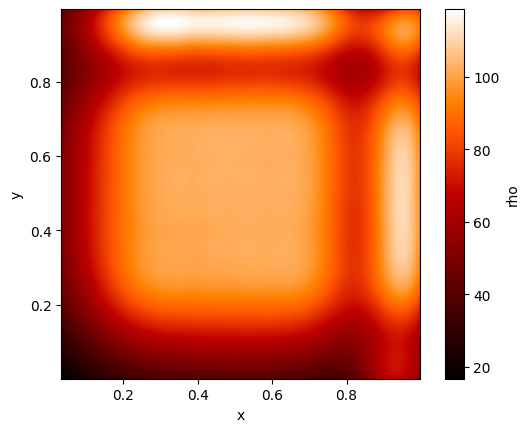

In [4]:
sdf.render('rho', xsec=0.0)